<h1><center>Uber Supply-Demand Gap</center></h1>

## Business Objectives:

The aim of analysis is to identify the root cause of the problem (i.e. cancellation and non-availability of cars) and recommend ways to improve the situation. As a result of the analysis, we should be able to present to the client the root cause(s) and possible hypotheses of the problem(s) and recommend ways to improve them. 

**Let's import required modules for the dataset**

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

**Let's load the dataset into df variable**

In [2]:
df=pd.read_csv("E:/Upgrad/EDA/upg-Assignment/upg-Uber Demand & Supply Assignment/UberRequestData.csv")

## Data Understanding:
**There are `six attributes` associated with each request made by a customer:**<br>

1. **`Request id`**: A unique identifier of the request.<br>
2. **`Time of request`**: The date and time at which the customer made the trip request.<br>
3. **`Drop-off time`**: The drop-off date and time, in case the trip was completed.<br>
4. **`Pick-up point`**: The point from which the request was made.<br>
5. **`Driver id`**: The unique identification number of the driver.<br>
6. **`Status of the request`**: The final status of the trip, that can be either completed, cancelled by the driver or no cars  available.

In [3]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [4]:
df.tail()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN
6744,6753,Airport,NaN,No Cars Available,15-07-2016 23:55:03,NaN


In [5]:
df.shape

(6745, 6)

## Cleaning Dataset

**Let's see the how many null values are present in the dataset**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [7]:
df[df["Driver id"].isna()]

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
4095,1362,City,NaN,No Cars Available,11/7/2016 0:02,NaN
4096,1364,City,NaN,No Cars Available,11/7/2016 0:06,NaN
4097,1366,City,NaN,No Cars Available,11/7/2016 0:09,NaN
4098,2,Airport,NaN,No Cars Available,11/7/2016 0:23,NaN
4099,7,Airport,NaN,No Cars Available,11/7/2016 0:30,NaN
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


In [8]:
df[df["Drop timestamp"].isna()]

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
2831,2905,City,1.0,Cancelled,13-07-2016 06:08:41,NaN
2832,4805,City,1.0,Cancelled,14-07-2016 17:07:58,NaN
2833,5202,Airport,1.0,Cancelled,14-07-2016 20:51:37,NaN
2834,5927,City,1.0,Cancelled,15-07-2016 10:12:40,NaN
2835,2347,Airport,2.0,Cancelled,12/7/2016 19:14,NaN
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


**As we can see from the above cells that there are columns which have null values but we should not impute it by any other as those are categorical values and moreover those columns will not help in our visualization so it is better to drop those columns rather keeping it.**

In [9]:
df.drop(["Driver id","Drop timestamp"],axis=1,inplace=True)

**Lets make a new column where it contains date and time of the request timestamp.**

In [10]:
df.dtypes

Request id            int64
Pickup point         object
Status               object
Request timestamp    object
dtype: object

**For that let's convert datetime columns to datatime format as there are in object format**

In [11]:
df.head()

,Request id,Pickup point,Status,Request timestamp
0,619,Airport,Trip Completed,11/7/2016 11:51
1,867,Airport,Trip Completed,11/7/2016 17:57
2,1807,City,Trip Completed,12/7/2016 9:17
3,2532,Airport,Trip Completed,12/7/2016 21:08
4,3112,City,Trip Completed,13-07-2016 08:33:16


In the request and drop timestamp we can see **`/`** in the column due to which cannot able to convert it into datatime for that lets replace **`/`** with **`-`**.

In [12]:
df["Request timestamp"] = pd.to_datetime(df["Request timestamp"], dayfirst=True)

In [13]:
df.head()

,Request id,Pickup point,Status,Request timestamp
0,619,Airport,Trip Completed,2016-07-11 11:51:00
1,867,Airport,Trip Completed,2016-07-11 17:57:00
2,1807,City,Trip Completed,2016-07-12 09:17:00
3,2532,Airport,Trip Completed,2016-07-12 21:08:00
4,3112,City,Trip Completed,2016-07-13 08:33:16


In [14]:
df.dtypes

Request id                    int64
Pickup point                 object
Status                       object
Request timestamp    datetime64[ns]
dtype: object

**Let's extract request date,time and hour from request timestamp for future visualization.**

In [15]:
df['Request Date'] = df["Request timestamp"].dt.date
df['Request Time'] = df["Request timestamp"].dt.time
df['Request Weekday'] = df['Request timestamp'].apply(lambda x: dt.datetime.strftime(x, '%A'))
df['Request Hour'] = df['Request timestamp'].apply(lambda x: x.hour)

In [16]:
df.head()

,Request id,Pickup point,Status,Request timestamp,Request Date,Request Time,Request Weekday,Request Hour
0,619,Airport,Trip Completed,2016-07-11 11:51:00,2016-07-11,11:51:00,Monday,11
1,867,Airport,Trip Completed,2016-07-11 17:57:00,2016-07-11,17:57:00,Monday,17
2,1807,City,Trip Completed,2016-07-12 09:17:00,2016-07-12,09:17:00,Tuesday,9
3,2532,Airport,Trip Completed,2016-07-12 21:08:00,2016-07-12,21:08:00,Tuesday,21
4,3112,City,Trip Completed,2016-07-13 08:33:16,2016-07-13,08:33:16,Wednesday,8


## Exploratory Data Analysis (EDA):

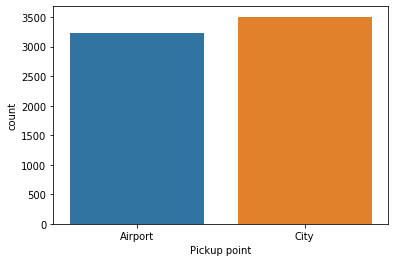

In [17]:
sns.countplot(df['Pickup point'])

**Almost similar count on the both the routes**

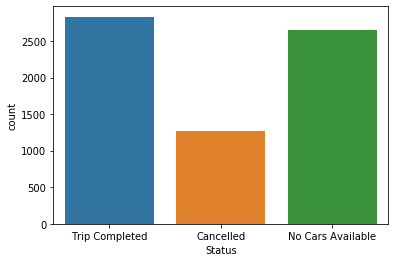

In [18]:
sns.countplot(df.Status)

**We can clearly see from this plot that company is losing quite a lot of business due to shortage of available Cabs.**

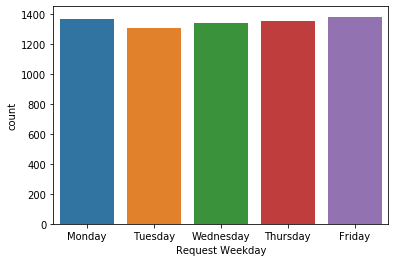

In [19]:
sns.countplot(df['Request Weekday'])

**As we see from the above plot that almost of the count on weekdays is similar.**

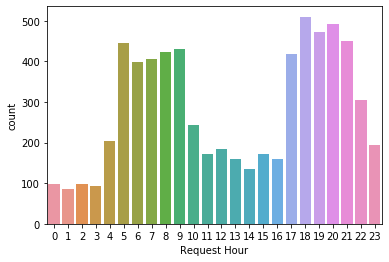

In [20]:
sns.countplot(df['Request Hour'])

**There is a huge increase in request of cabs for 2 times in a day first is 5am till 9am in morning and second is 5pm in evening till 9pm in night.**

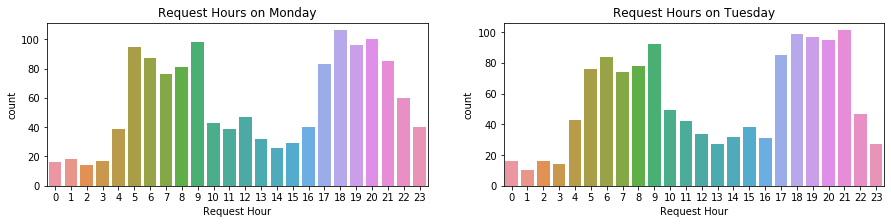

<Figure size 432x288 with 0 Axes>

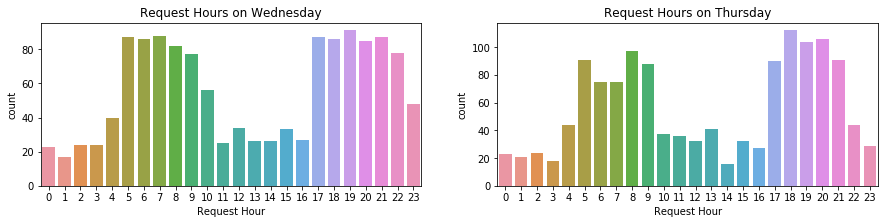

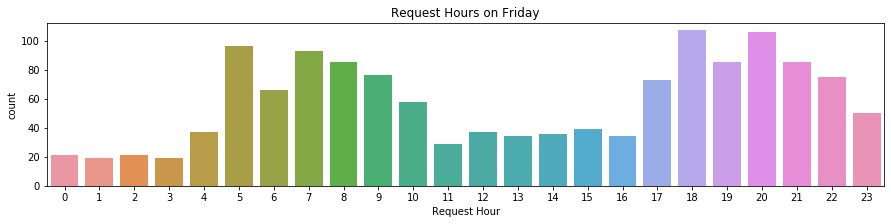

In [21]:
plt.figure(figsize=(15,3))
plt.figure(1)
plt.subplot(121)
sns.countplot(df[df["Request Weekday"]=="Monday"]["Request Hour"])
plt.title("Request Hours on Monday");
plt.subplot(122)
sns.countplot(df[df["Request Weekday"]=="Tuesday"]["Request Hour"])
plt.title("Request Hours on Tuesday");
plt.figure(2)
plt.figure(figsize=(15,3))
plt.subplot(121)
sns.countplot(df[df["Request Weekday"]=="Wednesday"]["Request Hour"])
plt.title("Request Hours on Wednesday");
plt.subplot(122)
sns.countplot(df[df["Request Weekday"]=="Thursday"]["Request Hour"])
plt.title("Request Hours on Thursday");
plt.figure(3)
plt.figure(figsize=(15,3))
plt.subplot(111)
sns.countplot(df[df["Request Weekday"]=="Friday"]["Request Hour"])
plt.title("Request Hours on Friday");

**Irrespective of days, it is clearly seen that the demand is high demand of cabs mainly in:**<br>
**1. 5am to 10am**<br>
**2. 5pm to 11pm**

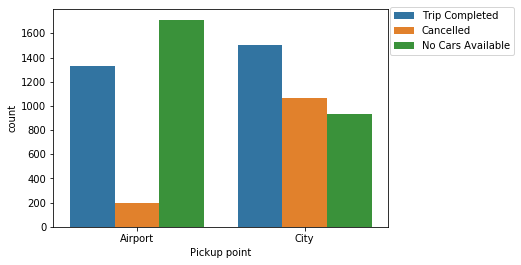

In [22]:
sns.countplot(x=df["Pickup point"],hue=df.Status)
plt.legend(bbox_to_anchor=(1.39, 0.9),loc='right')

**We can clearly see from the above plot that company is losing quite a lot of business due to shortage of available Cabs on the Airport route and also in the City route because of Cancelling and shortage of cars.**

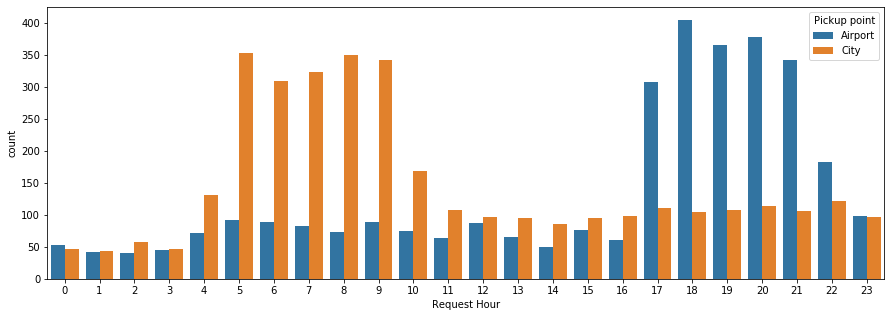

In [23]:
plt.figure(figsize=(15,5))
sns.countplot(x=df["Request Hour"],hue=df["Pickup point"])

**From the above plot we can see 2 trends first huge increase in request of in the morning in the City route and secondly huge increase in the Airport route in the evening it might be because of most of flights departure from the airport in the evening and arrivals of the most of flights are in the morning and rest of the day have equal no of request on both airport and city route.**

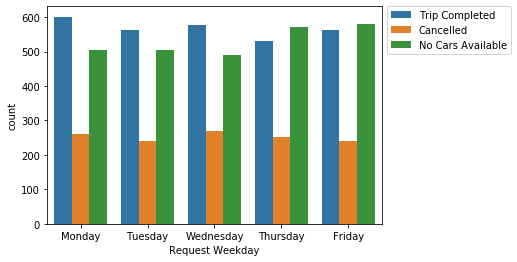

In [24]:
sns.countplot(x=df["Request Weekday"],hue=df["Status"])
plt.legend(bbox_to_anchor=(1.4, 0.89),loc='right')

**We can clearly see from the above plot that company is losing quite a lot of business due to shortage of available Cabs on Thursday and Friday and no of cancellatin due to shortage of cabs is equal to trips completed on that respective day.**

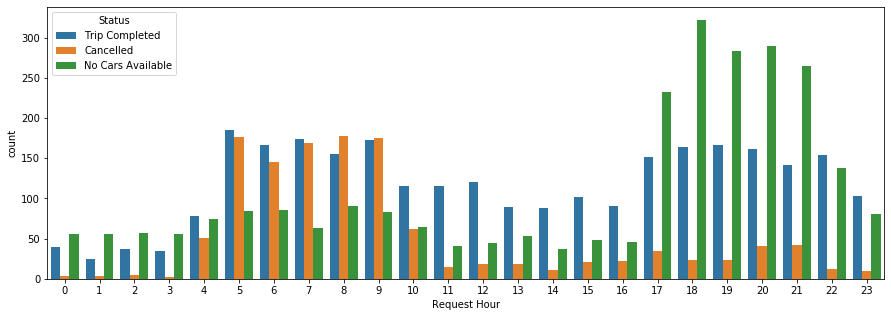

In [25]:
plt.figure(figsize=(15,5))
sns.countplot(x=df["Request Hour"],hue=df.Status)

**From the above plots we can see that there is 2 types of trends are followed in a day first in morning there is equal no of trips are cancelled as compare to trips to completed in the morning and secondly there is huge amount of the trips are cancelled due to shortage of cars in between evening and night.**

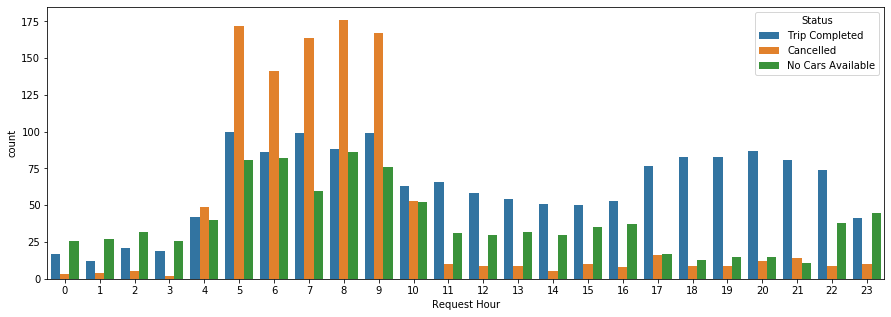

In [26]:
plt.figure(figsize=(15,5))
sns.countplot(x=df[df["Pickup point"]=="City"]["Request Hour"],hue=df.Status)

**We can clearly see from the above plot that company is losing quite a lot of business due to shortage of available Cabs in the morning in the City route.**

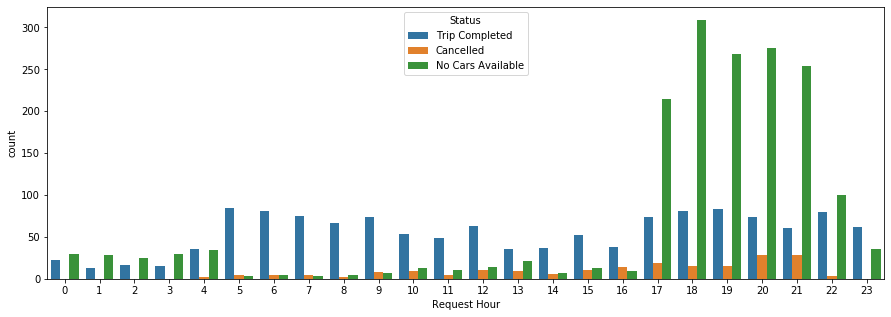

In [27]:
plt.figure(figsize=(15,5))
sns.countplot(x=df[df["Pickup point"]=="Airport"]["Request Hour"],hue=df.Status)

**We can clearly see from the above plot that company is losing quite a lot of business due to shortage of available Cabs in between evening and night in the Airport route.**

**Let's see no. of request on each day for every hours on the heatmap:**

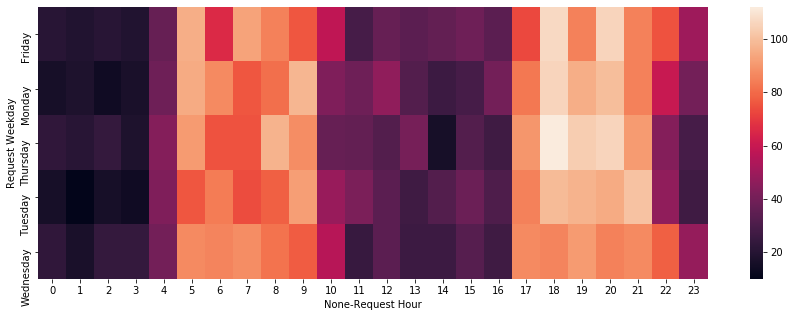

In [28]:
plt.figure(figsize=(15,5))
sns.heatmap(pd.pivot_table(index="Request Weekday",columns="Request Hour",values="Request id",aggfunc=["count"],data=df),xticklabels=range(24))

**Let's see no. of request are getting cancelled due to `No Cars Available` on each day for every hour on the heatmap:**

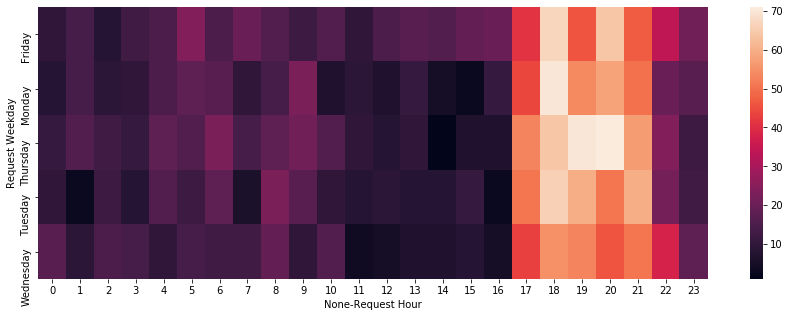

In [29]:
plt.figure(figsize=(15,5))
sns.heatmap(pd.pivot_table(index="Request Weekday",columns="Request Hour",values="Request id",aggfunc=["count"],data=df[df.Status=="No Cars Available"]),xticklabels=range(24))

**From both of these Heatmaps we tell that as company cannot keep up with the demand at the peak request hours.**

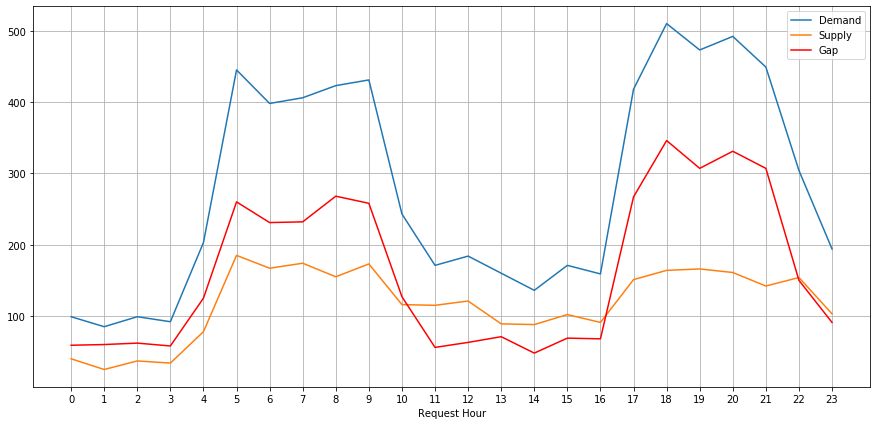

In [30]:
plt.subplots(figsize=(15,7))
plt.xticks([i for i in range(0,24)])
df.groupby(df['Request Hour']).count()['Request id'].plot(label='Demand')
df[df['Status']=="Trip Completed"].groupby(df[df['Status']=="Trip Completed"]['Request Hour']).count()['Request id'].plot(label='Supply')
(df.groupby(df['Request Hour']).count()['Request id'] - df[df['Status']=="Trip Completed"].groupby(df[df['Status']=="Trip Completed"]['Request Hour']).count()['Request id']).plot(label='Gap', c='red')
plt.grid("on")
plt.legend()

**This plot clearly visualizes the supply-demand problem that company is facing at the peak severity hours.**

**Let's make similar plot for no. of request id for Airport and City route and see the trend.**

### Hourly Supply Demand Curve For City to Airport

C:\Users\Daniel\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\Daniel\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


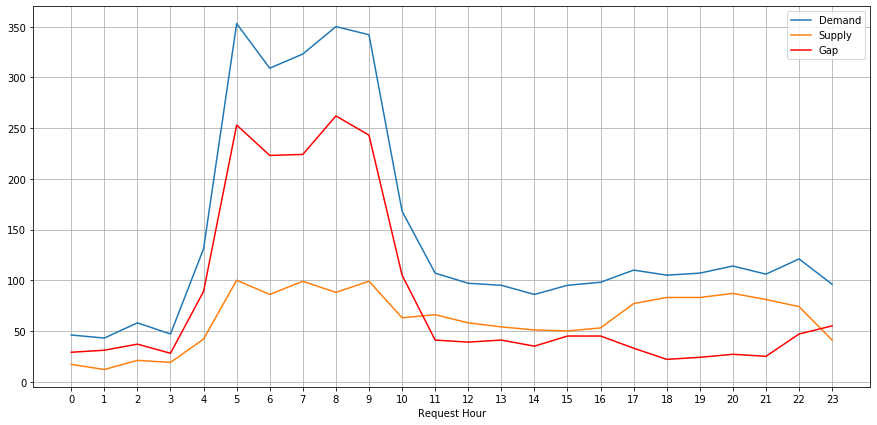

In [31]:
plt.subplots(figsize=(15,7))
plt.xticks([i for i in range(0,24)])
df.groupby(df[df["Pickup point"]=="City"]['Request Hour']).count()['Request id'].plot(label='Demand')
df[df["Pickup point"]=="City"][df[df["Pickup point"]=="City"]['Status']=="Trip Completed"].groupby(df[df["Pickup point"]=="City"][df['Status']=="Trip Completed"]['Request Hour']).count()['Request id'].plot(label='Supply')
(df[df["Pickup point"]=="City"].groupby(df[df["Pickup point"]=="City"]['Request Hour']).count()['Request id'] - df[df["Pickup point"]=="City"][df['Status']=="Trip Completed"].groupby(df[df["Pickup point"]=="City"][df['Status']=="Trip Completed"]['Request Hour']).count()['Request id']).plot(label='Gap', c='red')
plt.grid("on")
plt.legend()

### Hourly Supply Demand Curve For Airport to City

C:\Users\Daniel\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\Daniel\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


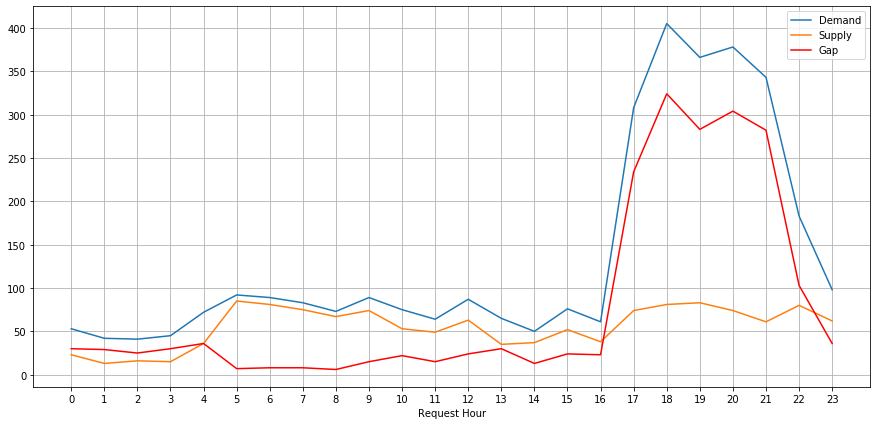

In [32]:
plt.subplots(figsize=(15,7))
plt.xticks([i for i in range(0,24)])
df.groupby(df[df["Pickup point"]=="Airport"]['Request Hour']).count()['Request id'].plot(label='Demand')
df[df["Pickup point"]=="Airport"][df[df["Pickup point"]=="Airport"]['Status']=="Trip Completed"].groupby(df[df["Pickup point"]=="Airport"][df['Status']=="Trip Completed"]['Request Hour']).count()['Request id'].plot(label='Supply')
(df[df["Pickup point"]=="Airport"].groupby(df[df["Pickup point"]=="Airport"]['Request Hour']).count()['Request id'] - df[df["Pickup point"]=="Airport"][df['Status']=="Trip Completed"].groupby(df[df["Pickup point"]=="Airport"][df['Status']=="Trip Completed"]['Request Hour']).count()['Request id']).plot(label='Gap', c='red')
plt.grid("on")
plt.legend()

## Binning Into Time Categories for making more Deeper Visualization

In [33]:
def time_period(x):
    if x < 6:
        return 'Early Morning'
    elif 6 <= x < 12:
        return 'Morning'
    elif 12 <= x < 16:
        return 'Afternoon'
    elif 16 <= x < 20:
        return 'Evening'
    elif 20 <= x < 23:
        return 'Night'
    else:
        return 'Late Night'

df['time_slot'] = df['Request Hour'].apply(lambda x: time_period(x))

In [34]:
df.head()

,Request id,Pickup point,Status,Request timestamp,Request Date,Request Time,Request Weekday,Request Hour,time_slot
0,619,Airport,Trip Completed,2016-07-11 11:51:00,2016-07-11,11:51:00,Monday,11,Morning
1,867,Airport,Trip Completed,2016-07-11 17:57:00,2016-07-11,17:57:00,Monday,17,Evening
2,1807,City,Trip Completed,2016-07-12 09:17:00,2016-07-12,09:17:00,Tuesday,9,Morning
3,2532,Airport,Trip Completed,2016-07-12 21:08:00,2016-07-12,21:08:00,Tuesday,21,Night
4,3112,City,Trip Completed,2016-07-13 08:33:16,2016-07-13,08:33:16,Wednesday,8,Morning


**Let's see no of values present in the different time slots:**

In [35]:
print(df.time_slot[df.time_slot == "Early Morning"].value_counts(),"\n")
print(df.time_slot[df.time_slot == "Morning"].value_counts(),"\n")
print(df.time_slot[df.time_slot == "Afternoon"].value_counts(),"\n")
print(df.time_slot[df.time_slot == "Evening"].value_counts(),"\n")
print(df.time_slot[df.time_slot == "Night"].value_counts(),"\n")
print(df.time_slot[df.time_slot == "Late Night"].value_counts(),"\n")

Early Morning    1023
Name: time_slot, dtype: int64 

Morning    2072
Name: time_slot, dtype: int64 

Afternoon    651
Name: time_slot, dtype: int64 

Evening    1560
Name: time_slot, dtype: int64 

Night    1245
Name: time_slot, dtype: int64 

Late Night    194
Name: time_slot, dtype: int64 



**Let's see the status of the ride for different time slots** 

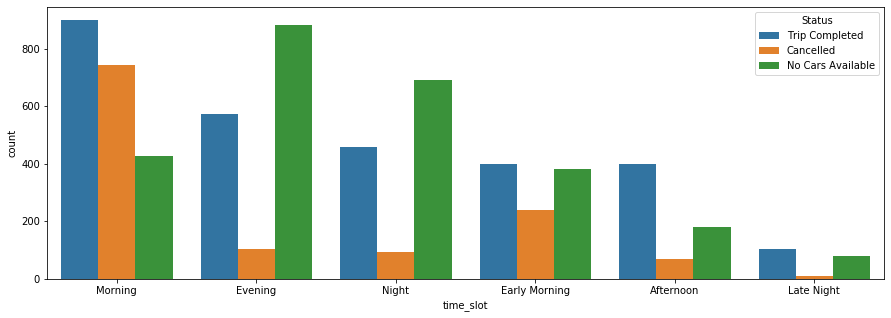

In [36]:
plt.figure(figsize=(15,5))
sns.countplot(x=df.time_slot,hue=df.Status)

**Let's see the status of the rides at different routes on different time slots:**

In [37]:
#DEMAND
print("City Morning & Afternoon Cab Requirement:",len(df[((df.time_slot == "Early Morning")|(df.time_slot == "Morning")|(df.time_slot == "Afternoon"))&(df["Pickup point"]=="City")]))
print("City Evening & Night Cab Requirement:",len(df[((df.time_slot == "Evening")|(df.time_slot == "Night")|(df.time_slot == "Late Night"))&(df["Pickup point"]=="City")]))

City Morning & Afternoon Cab Requirement: 2650
City Evening & Night Cab Requirement: 857


In [38]:
#SUPPLY
print("City Morning & Afternoon Trip Completed:",len(df[((df.time_slot == "Early Morning")|(df.time_slot == "Morning")|(df.time_slot == "Afternoon"))&(df["Pickup point"]=="City")& (df["Status"] == "Trip Completed")]))
print("City Evening & Night Trip Completed:",len(df[((df.time_slot == "Evening")|(df.time_slot == "Night")|(df.time_slot == "Late Night"))&(df["Pickup point"]=="City")& (df["Status"] == "Trip Completed")]))

City Morning & Afternoon Trip Completed: 925
City Evening & Night Trip Completed: 579


In [39]:
#GAP
print("City Morning & Afternoon Trip Gap:",len(df[((df.time_slot == "Early Morning")|(df.time_slot == "Morning")|(df.time_slot == "Afternoon"))&(df["Pickup point"]=="City")& ((df["Status"] == "Cancelled")|(df["Status"] == "No Cars Available"))]))
print("City Evening & Night Trip Gap:",len(df[((df.time_slot == "Evening")|(df.time_slot == "Night")|(df.time_slot == "Late Night"))&(df["Pickup point"]=="City")& ((df["Status"] == "Cancelled")|(df["Status"] == "No Cars Available"))]))

City Morning & Afternoon Trip Gap: 1725
City Evening & Night Trip Gap: 278


In [40]:
print("City Morning & Afternoon Trip Gap due Cancellation:",len(df[((df.time_slot == "Early Morning")|(df.time_slot == "Morning")|(df.time_slot == "Afternoon"))&(df["Pickup point"]=="City")&(df["Status"] == "Cancelled")]))
print("City Evening & Night Trip Gap due Cancellation:",len(df[((df.time_slot == "Evening")|(df.time_slot == "Night")|(df.time_slot == "Late Night"))&(df["Pickup point"]=="City")&(df["Status"] == "Cancelled")]))

City Morning & Afternoon Trip Gap due Cancellation: 979
City Evening & Night Trip Gap due Cancellation: 87


In [41]:
print("City Morning & Afternoon Trip Gap due to Shortage of Cars:",len(df[((df.time_slot == "Early Morning")|(df.time_slot == "Morning")|(df.time_slot == "Afternoon"))&(df["Pickup point"]=="City")&(df["Status"] == "No Cars Available")]))
print("City Evening & Night Trip Gap due to Shortage of Cars:",len(df[((df.time_slot == "Evening")|(df.time_slot == "Night")|(df.time_slot == "Late Night"))&(df["Pickup point"]=="City")&(df["Status"] == "No Cars Available")]))

City Morning & Afternoon Trip Gap due to Shortage of Cars: 746
City Evening & Night Trip Gap due to Shortage of Cars: 191


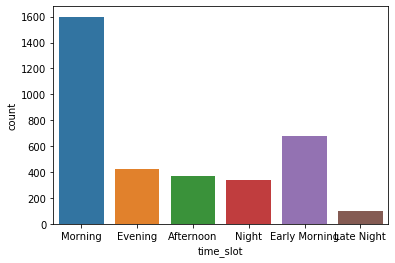

In [42]:
sns.countplot(df[df["Pickup point"]=="City"].time_slot)

Text(0.5, 1.0, 'Uber Supply-Demand Gap in City')

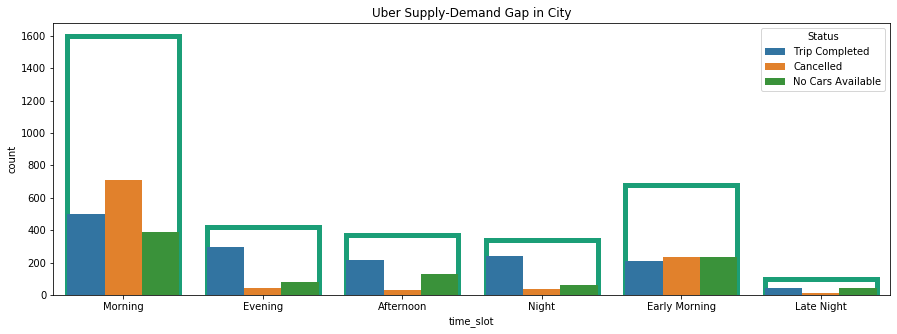

In [43]:
plt.figure(figsize=(15,5))
sns.countplot(df[df["Pickup point"]=="City"].time_slot,facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("Dark2", 1))
sns.countplot(x=df[df["Pickup point"]=="City"].time_slot,hue=df.Status)
plt.title("Uber Supply-Demand Gap in City")

**From the above plots we can say one thing that in the City route in morning higher no. of rides are getting cancelled.**

In [44]:
#DEMAND
print("Airport Morning & Afternoon Cab Requirement:",len(df[((df.time_slot == "Early Morning")|(df.time_slot == "Morning")|(df.time_slot == "Afternoon"))&(df["Pickup point"]=="Airport")]))
print("Airport Evening & Night Cab Requirement:",len(df[((df.time_slot == "Evening")|(df.time_slot == "Night")|(df.time_slot == "Late Night"))&(df["Pickup point"]=="Airport")]))

Airport Morning & Afternoon Cab Requirement: 1096
Airport Evening & Night Cab Requirement: 2142


In [45]:
#SUPPLY
print("Airport Morning & Afternoon Trip Completed:",len(df[((df.time_slot == "Early Morning")|(df.time_slot == "Morning")|(df.time_slot == "Afternoon"))&(df["Pickup point"]=="Airport")& (df["Status"] == "Trip Completed")]))
print("Airport Evening & Night Trip Completed:",len(df[((df.time_slot == "Evening")|(df.time_slot == "Night")|(df.time_slot == "Late Night"))&(df["Pickup point"]=="Airport")& (df["Status"] == "Trip Completed")]))

Airport Morning & Afternoon Trip Completed: 774
Airport Evening & Night Trip Completed: 553


In [46]:
#GAP
print("Airport Morning & Afternoon Trip Gap:",len(df[((df.time_slot == "Early Morning")|(df.time_slot == "Morning")|(df.time_slot == "Afternoon"))&(df["Pickup point"]=="Airport")& ((df["Status"] == "Cancelled")|(df["Status"] == "No Cars Available"))]))
print("Airport Evening & Night Trip Gap:",len(df[((df.time_slot == "Evening")|(df.time_slot == "Night")|(df.time_slot == "Late Night"))&(df["Pickup point"]=="Airport")& ((df["Status"] == "Cancelled")|(df["Status"] == "No Cars Available"))]))

Airport Morning & Afternoon Trip Gap: 322
Airport Evening & Night Trip Gap: 1589


In [47]:
print("Airport Morning & Afternoon Trip Gap due Cancellation:",len(df[((df.time_slot == "Early Morning")|(df.time_slot == "Morning")|(df.time_slot == "Afternoon"))&(df["Pickup point"]=="Airport")&(df["Status"] == "Cancelled")]))
print("Airport Evening & Night Trip Gap due Cancellation:",len(df[((df.time_slot == "Evening")|(df.time_slot == "Night")|(df.time_slot == "Late Night"))&(df["Pickup point"]=="Airport")&(df["Status"] == "Cancelled")]))

Airport Morning & Afternoon Trip Gap due Cancellation: 75
Airport Evening & Night Trip Gap due Cancellation: 123


In [48]:
print("Airport Morning & Afternoon Trip Gap due to Shortage of Cars:",len(df[((df.time_slot == "Early Morning")|(df.time_slot == "Morning")|(df.time_slot == "Afternoon"))&(df["Pickup point"]=="Airport")&(df["Status"] == "No Cars Available")]))
print("Airport Evening & Night Trip Gap due to Shortage of Cars:",len(df[((df.time_slot == "Evening")|(df.time_slot == "Night")|(df.time_slot == "Late Night"))&(df["Pickup point"]=="Airport")&(df["Status"] == "No Cars Available")]))

Airport Morning & Afternoon Trip Gap due to Shortage of Cars: 247
Airport Evening & Night Trip Gap due to Shortage of Cars: 1466


Text(0.5, 1.0, 'Uber Supply-Demand Gap in Airport')

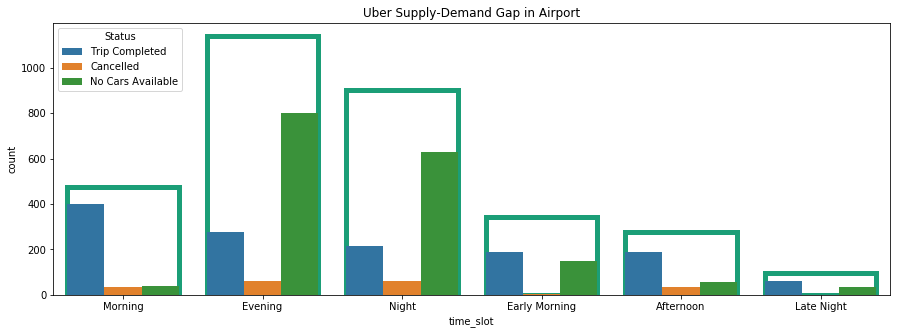

In [49]:
plt.figure(figsize=(15,5))
sns.countplot(df[df["Pickup point"]=="Airport"].time_slot,facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("Dark2", 1))
sns.countplot(x=df[df["Pickup point"]=="Airport"].time_slot,hue=df.Status)
plt.title("Uber Supply-Demand Gap in Airport")

**We can clearly see from the above plot that company is losing quite a lot of business due to shortage of available Cabs at the Airport route in the evening and night time slots.**

**Let's see the no. of request for different routes for different time slots:**

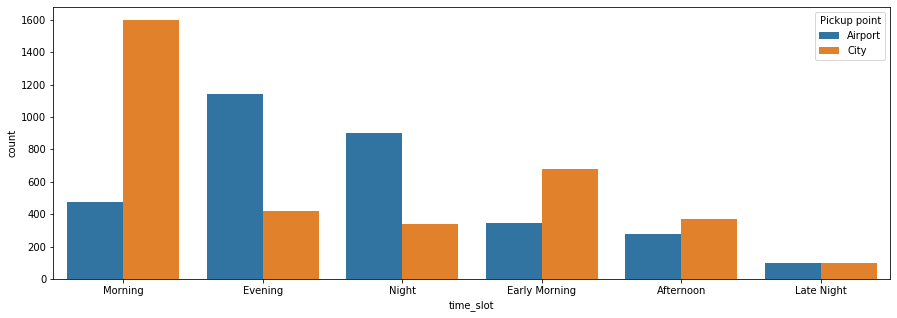

In [50]:
plt.figure(figsize=(15,5))
sns.countplot(x=df.time_slot,hue=df["Pickup point"])

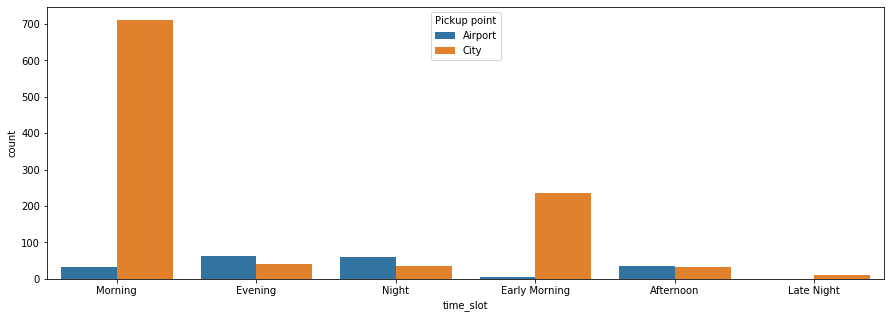

In [51]:
plt.figure(figsize=(15,5))
sns.countplot(x=df[df["Status"]=="Cancelled"].time_slot,hue=df["Pickup point"])

**There is huge amount of cabs are cancelled in the city in Early Morning and Morning as compare to other different time slots. It might be because of at that time there will be no flights will be incoming so cabs have to wait at airport for longer duration.**

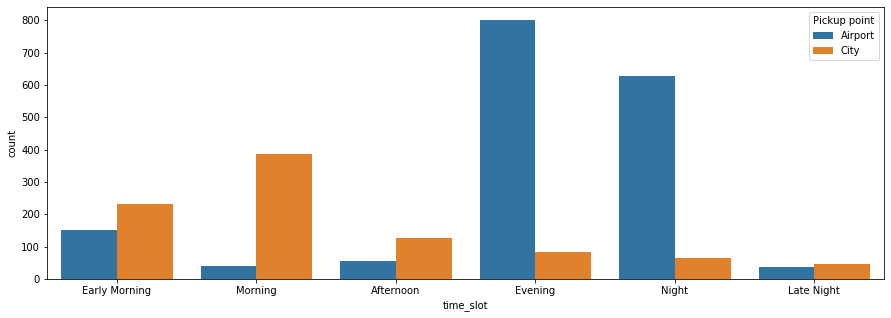

In [52]:
plt.figure(figsize=(15,5))
sns.countplot(x=df[df["Status"]=="No Cars Available"].time_slot,hue=df["Pickup point"])

**We can clearly see from the above plot that company is losing quite a lot of business due to shortage of available Cabs for Airport route in Evening and Night time slots as compare to different time slots and this same trend of shortage of car is also in the City route in the Early Morning and Morning time slot also.**